<a href="https://colab.research.google.com/github/dev-kentayamada/machine-learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰
$$p\left( X\right) =\dfrac{e^{\left( \beta_0+\beta_1x_1+ \dots \beta_kx_k \right) }}{1+e^{\left( \beta_0+\beta_1x_1+ \dots \beta_kx_k \right) }}$$
- 前提
 - 内相性がないこと
 - 正規性と同分散性
 - 自己相関がないこと
 - 多重共線性がないこと

* ロジスティック回帰は、ある事象が発生する確率を予測する


##ライブラリのインポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from IPython.display import HTML, display
from statsmodels.stats.outliers_influence import variance_inflation_factor
#出力結果に対してフィルタリング・ページング
%load_ext google.colab.data_table
sns.set() #seabornのデフォルトスタイルを適用)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##データを読み込む

###訓練データ

In [ ]:
!gdown --id 1O9qw9cJ1-IMSwfChEyv2ZfCBp4KeEWYo #Google driveからデータをダウンロード
train = pd.read_csv('2.02. Binary predictors.csv')
display(train)
display(train.describe(include='all'))
display(train.info())

Downloading...
From: https://drive.google.com/uc?id=1O9qw9cJ1-IMSwfChEyv2ZfCBp4KeEWYo
To: /content/2.02. Binary predictors.csv
100% 2.62k/2.62k [00:00<00:00, 988kB/s]


,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


,SAT,Admitted,Gender
count,168.000000,168,168
unique,NaN,2,2
top,NaN,Yes,Male
freq,NaN,94,90
mean,1695.273810,NaN,NaN
std,183.019017,NaN,NaN
min,1334.000000,NaN,NaN
25%,1547.500000,NaN,NaN
50%,1691.500000,NaN,NaN
75%,1844.500000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
 2   Gender    168 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


None

###テストデータ

In [ ]:
!gdown --id 1chOPVGcQ56HLp2RIjJdQzgzUEiCBbYxb #Google driveからデータをダウンロード
test = pd.read_csv('2.03. Test dataset.csv')
display(test)
display(test.describe(include='all'))
display(test.info())

Downloading...
From: https://drive.google.com/uc?id=1chOPVGcQ56HLp2RIjJdQzgzUEiCBbYxb
To: /content/2.03. Test dataset.csv
100% 322/322 [00:00<00:00, 476kB/s]


,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


,SAT,Admitted,Gender
count,19.000000,19,19
unique,NaN,2,2
top,NaN,Yes,Female
freq,NaN,13,11
mean,1716.157895,NaN,NaN
std,189.579729,NaN,NaN
min,1323.000000,NaN,NaN
25%,1610.500000,NaN,NaN
50%,1726.000000,NaN,NaN
75%,1842.500000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       19 non-null     int64 
 1   Admitted  19 non-null     object
 2   Gender    19 non-null     object
dtypes: int64(1), object(2)
memory usage: 584.0+ bytes


None

##前処理

###カテゴリカルデータを数字へ変換

####訓練データ

In [ ]:
train['Admitted (yes=1/no=0)'] = train['Admitted'].map({'Yes':1,'No':0})
train['Gender (Female=1/Male=0)'] = train['Gender'].map({'Female':1,'Male':0})
train

,SAT,Admitted,Gender,Admitted (yes=1/no=0),Gender (Female=1/Male=0)
0,1363,No,Male,0,0
1,1792,Yes,Female,1,1
2,1954,Yes,Female,1,1
3,1653,No,Male,0,0
4,1593,No,Male,0,0
...,...,...,...,...,...
163,1722,Yes,Female,1,1
164,1750,Yes,Male,1,0
165,1555,No,Male,0,0
166,1524,No,Male,0,0


####テストデータ

In [ ]:
test['Admitted (yes=1/no=0)'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender (Female=1/Male=0)'] = test['Gender'].map({'Female':1,'Male':0})
test

,SAT,Admitted,Gender,Admitted (yes=1/no=0),Gender (Female=1/Male=0)
0,1323,No,Male,0,0
1,1725,Yes,Female,1,1
2,1762,Yes,Female,1,1
3,1777,Yes,Male,1,0
4,1665,No,Male,0,0
5,1556,Yes,Female,1,1
6,1731,Yes,Female,1,1
7,1809,Yes,Female,1,1
8,1930,Yes,Female,1,1
9,1708,Yes,Male,1,0


##データを可視化

###最小二乗法を適用するための条件 **’’線形性’’** を満たしていない
* 両端の値は０以下または１以上になっているため、直線はデータを正しく予測していない

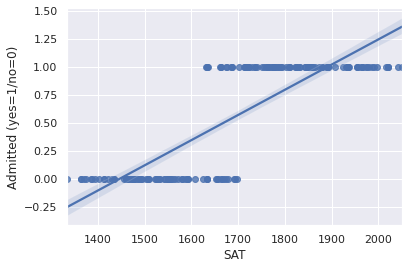

In [ ]:
sns.regplot(data=train, x="SAT", y="Admitted (yes=1/no=0)")

##回帰分析に使うデータの指定

###訓練データ

In [ ]:
y_train = train['Admitted (yes=1/no=0)'] #目的変数
X_trains = [train['SAT'], train['Gender (Female=1/Male=0)'], train[['SAT','Gender (Female=1/Male=0)']]] #説明変数

###テストデータ

In [ ]:
y_test = test['Admitted (yes=1/no=0)'] #目的変数
X_tests = [test['SAT'], test['Gender (Female=1/Male=0)'], test[['SAT','Gender (Female=1/Male=0)']]] #説明変数
X_tests = [sm.add_constant(X) for X in X_tests]

##ロジスティック回帰分析
- 最尤推定法(MLE)
 - 尤度関数
   - 作成したモデルが、実際の変数間の関係をどれぐらい良く示しているか
   - 尤度関数の値が大きいほど、モデルが正確である確率が高いことを意味している
   - 最尤推定法は、尤度関数の値を最大化するよう試みます
   - コンピューターは、尤度の値が最大になるように演算を繰り返していきます
- 対数尤度(Log-Likelihood)
 - 対数尤度の値は基本的にマイナスになるが、その値は大きければ大きいほうが良い
- 対数尤度のNull(LL-Null)
 - 説明変数のない場合の対数尤度を示している
- 対数尤度比(LLR p-value)
 - モデルが統計的にLLNullと異なるか。即ち意味がないモデルかどうかを確認するために使われる
- 疑似決定係数(Pseudo R-squ.)
 - 疑似決定係数の値は0.2から0.4の間だと良いとされている
 - モデルが異なれば、そこから得られる疑似決定係数の値も異なる


In [ ]:
results = []
for X in X_trains:
  model = sm.Logit(y_train, sm.add_constant(X))
  results.append(model.fit())

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


##計算された回帰モデル


In [ ]:
def formConfusionMatrix(cm):
  cm_df = pd.DataFrame(cm)
  cm_df.columns = ['Predicted 0', 'Predicted 1']
  cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
  display(cm_df)
  return cm_df

def confusionMatrix(data, actual_values, model):
  pred_values = model.predict(data)
  bins=np.array([0,0.5,1])
  cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  return cm, accuracy

def getAccuracy(cm_df):
  cm = np.array(cm_df)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  return accuracy 

###SATのみ
$$log\left( \dfrac{\pi }{1-\pi }\right)=-69.91+0.042 \times SAT$$
$$\log \left( \dfrac{odds_2}{odds_1}\right) = 0.042 \times({SAT_2}-{SAT_1})$$
SATスコアが1違った場合:<br>
$\log \left( \dfrac{odds_2}{odds_1}\right) = 0.042 \times 1$<br>
${odds_2}=104.2\% \times {odds_1}$<br>
SATスコアの値が1上がるたびに、合格する可能性のオッズは4.2%ずつ上がっていく

In [ ]:
print(results[0].summary())

                             Logit Regression Results                            
Dep. Variable:     Admitted (yes=1/no=0)   No. Observations:                  168
Model:                             Logit   Df Residuals:                      166
Method:                              MLE   Df Model:                            1
Date:                   Sun, 28 Mar 2021   Pseudo R-squ.:                  0.7992
Time:                           01:41:49   Log-Likelihood:                -23.145
converged:                          True   LL-Null:                       -115.26
Covariance Type:               nonrobust   LLR p-value:                 5.805e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060

Possibly complete quasi-sep

####訓練データ

In [ ]:
cm_df = formConfusionMatrix(results[0].pred_table())
accurecy = getAccuracy(cm_df)
print ('モデルの正確率: {:.3%}'.format(accurecy))
print ('モデルの誤判別率: {:.3%}'.format(1-accurecy))

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


モデルの正確率: 91.667%
モデルの誤判別率: 8.333%


####テストデータ

In [ ]:
cm = confusionMatrix(X_tests[0], y_test, results[0])
cm_df = formConfusionMatrix(cm[0])
print ('モデルの正確率: {:.3%}'.format(cm[1]))
print ('モデルの誤判別率: {:.3%}'.format(1-cm[1]))

,Predicted 0,Predicted 1
Actual 0,4.0,2.0
Actual 1,1.0,12.0


モデルの正確率: 84.211%
モデルの誤判別率: 15.789%


###Genderのみ
$$log\left( \dfrac{\pi }{1-\pi }\right)=-0.64+2.08 \times Gender$$
$$\log \left( \dfrac{odds_2}{odds_1}\right) = 2.08 \times({Gender_2}-{Gender_1})$$
性別による合格率の違い:<br>
$\log \left( \dfrac{odds_{female}}{odds_{male}}\right) = 2.08 \times(1-0)$<br>
${odds_{female}}=7.99 \times {odds_{male}}$<br>
女性は男性よりも約8倍合格率が高いことを示している

In [ ]:
print(results[1].summary())

                             Logit Regression Results                            
Dep. Variable:     Admitted (yes=1/no=0)   No. Observations:                  168
Model:                             Logit   Df Residuals:                      166
Method:                              MLE   Df Model:                            1
Date:                   Sun, 28 Mar 2021   Pseudo R-squ.:                  0.1659
Time:                           01:41:49   Log-Likelihood:                -96.140
converged:                          True   LL-Null:                       -115.26
Covariance Type:               nonrobust   LLR p-value:                 6.283e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender (Female=1/Male=0)     2.0786      0.363      5.727      0.

####訓練データ

In [ ]:
cm_df = formConfusionMatrix(results[1].pred_table())
accurecy = getAccuracy(cm_df)
print ('モデルの正確率: {:.3%}'.format(accurecy))
print ('モデルの誤判別率: {:.3%}'.format(1-accurecy))

,Predicted 0,Predicted 1
Actual 0,59.0,15.0
Actual 1,31.0,63.0


モデルの正確率: 72.619%
モデルの誤判別率: 27.381%


####テストデータ

In [ ]:
cm = confusionMatrix(X_tests[1], y_test, results[1])
cm_df = formConfusionMatrix(cm[0])
print ('モデルの正確率: {:.3%}'.format(cm[1]))
print ('モデルの誤判別率: {:.3%}'.format(1-cm[1]))

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,3.0,10.0


モデルの正確率: 78.947%
モデルの誤判別率: 21.053%


###SATとGender
$e^{1.94}\simeq 7$<br>
SATスコアが同じであれば、女性は男性よりも約7倍合格率が高いことがわかる

In [ ]:
print(results[2].summary())

                             Logit Regression Results                            
Dep. Variable:     Admitted (yes=1/no=0)   No. Observations:                  168
Model:                             Logit   Df Residuals:                      165
Method:                              MLE   Df Model:                            2
Date:                   Sun, 28 Mar 2021   Pseudo R-squ.:                  0.8249
Time:                           01:41:49   Log-Likelihood:                -20.180
converged:                          True   LL-Null:                       -115.26
Covariance Type:               nonrobust   LLR p-value:                 5.118e-42
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT                          0.0406      0.010      4.129      0.

####訓練データ

In [ ]:
cm_df = formConfusionMatrix(results[2].pred_table())
accurecy = getAccuracy(cm_df)
print ('モデルの正確率: {:.3%}'.format(accurecy))
print ('モデルの誤判別率: {:.3%}'.format(1-accurecy))

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


モデルの正確率: 94.643%
モデルの誤判別率: 5.357%


####テストデータ

In [ ]:
cm = confusionMatrix(X_tests[2], y_test, results[2])
cm_df = formConfusionMatrix(cm[0])
print ('モデルの正確率: {:.3%}'.format(cm[1]))
print ('モデルの誤判別率: {:.3%}'.format(1-cm[1]))

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


モデルの正確率: 89.474%
モデルの誤判別率: 10.526%
